# Combined Cycle Power Plant Energy Prediction

## Machine Learning Project

**Duke University AI Product Management - Final Project Report**

This project utilizes machine learning techniques to predict the electrical energy output (PE) of a Combined Cycle Power Plant based on environmental sensor data.

**Data Features:**
- AT: Ambient Temperature (°C)
- V: Exhaust Vacuum (cm Hg)
- AP: Ambient Pressure (millibar)
- RH: Relative Humidity (%)
- PE: Net Hourly Electrical Energy Output (**MW: MegaWatt**) - **Target Variable**

> **Note**: Since the target variable PE is measured in MW, the prediction error MAE is also in MW. For example, MAE = 2.33 MW means the average prediction error is 2.33 megawatts.

---

**Project Structure**: This report follows course requirements, covering four key aspects: Modeling Approach, Model Building, Model Evaluation, and Model Interpretation.

## 1. Import Required Libraries

# 🎯 PART 1: Modeling Approach

In this stage, we will:
- ✅ Import necessary machine learning libraries
- ✅ Load and check data quality
- ✅ Perform Exploratory Data Analysis (EDA)
- ✅ Select appropriate features for modeling

---

In [1]:
# Data processing and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']  # Support for displaying text
plt.rcParams['axes.unicode_minus'] = False  # Display minus sign properly

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [2]:
# Load CSV data
df = pd.read_csv('../CCPP_data.csv')

# Display basic information
print(f"Dataset size: {df.shape[0]} records, {df.shape[1]} columns")
print("\nFirst 5 records:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

Dataset size: 9568 records, 5 columns

First 5 records:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Data types:
AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

Missing values:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

**EDA (Exploratory Data Analysis)** aims to:
- Understand data distribution and ranges
- Discover relationships between features and target variable
- Provide basis for model selection

This step helps us:
1. Verify data value ranges are reasonable
2. Identify which features correlate most with power output
3. Decide if feature engineering is needed

In [12]:
# Descriptive statistics
print("=== Descriptive Statistics ===")
print(df.describe())

print("\nFeature ranges:")
print("- AT (Ambient Temperature): 1.81°C ~ 37.11°C")
print("- V (Exhaust Vacuum): 25.36 ~ 81.56 cm Hg")
print("- AP (Ambient Pressure): 992.89 ~ 1033.30 millibar")
print("- RH (Relative Humidity): 25.56% ~ 100.16%")
print("- PE (Power Output): 420.26 ~ 495.76 MW [Target Variable]")

# Display correlations with target variable PE
print("\n=== Feature Correlation with Power Output (PE) ===")
correlation_matrix = df.corr()
print(correlation_matrix['PE'].sort_values(ascending=False))
print("\nKey Insights:")
print("- AT (Temperature): Strong negative correlation (-0.948)")
print("- V (Vacuum): Strong negative correlation (-0.870)")
print("- AP (Pressure): Moderate positive correlation (+0.518)")
print("- RH (Humidity): Weak positive correlation (+0.390)")

=== Descriptive Statistics ===
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

Feature ranges:
- AT (Ambient Temperature): 1.81°C ~ 37.11°C
- V (Exhaust Vacuum): 25.36 ~ 81.56 cm Hg
- AP (Ambient Pressure): 992.89 ~ 1033.30 millibar
- RH (Relative Humidity): 25.56% ~ 100.16%
- PE (Power Output): 420.26 ~ 495.76 MW [Target Variable]

=== Feature Correlation with Power Output (PE) ===
PE    1.000000
AP    0

## 4. Prepare Features and Target Variable

### 🔍 Why Choose All 4 Features?

Based on the correlation analysis above, we decided to use **all 4 features (AT, V, AP, RH)** for the following reasons:

**1. All features show significant correlation with target variable (PE):**
- AT (Ambient Temperature): **-0.948** (strong negative correlation) ✅ 
- V (Exhaust Vacuum): **-0.870** (strong negative correlation) ✅
- AP (Ambient Pressure): **+0.518** (moderate positive correlation) ✅
- RH (Relative Humidity): **+0.390** (weak positive correlation) ✅

**2. Each feature has physical significance:**
- This is real power plant operational data; all environmental parameters affect generation efficiency
- Even though RH has weaker correlation, it may have important impact under certain conditions

**3. Feature count is reasonable:**
- Only 4 features, won't cause curse of dimensionality
- Sufficient data volume (9568 records) to support a model with 4 features

**4. Random Forest can automatically handle feature importance:**
- If a feature is unimportant, Random Forest will automatically reduce its weight
- No need to manually remove features

**Conclusion:** Keep all 4 features and let the model decide how to use them!

In [ ]:
# Define features (X) and target variable (y)
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

print(f"Feature matrix X shape: {X.shape}")
print(f"Target Variable y shape: {y.shape}")
print("\nFeatures used:")
print("- AT: Ambient Temperature")
print("- V: Exhaust Vacuum")
print("- AP: Ambient Pressure")
print("- RH: Relative Humidity")

Feature matrix X shape: (9568, 4)
Target Variable y shape: (9568,)

Features used:
- AT: Ambient Temperature
- V: Exhaust Vacuum
- AP: Ambient Pressure
- RH: Relative Humidity


## 5. Initial Data Split

Split data into **Training Set (80%)** and **Test Set (20%)**.

⚠️ **Important**: The test set must be completely reserved until the final evaluation to ensure unbiased results.

# 🏗️ PART 2: Model Building

In this stage, we will:
- ✅ Design rigorous data splitting strategy
- ✅ Define candidate algorithms and hyperparameters
- ✅ Use cross-validation to select the best model

---

In [6]:
# Split data into training set (80%) and test set (20%)
# random_state=42 ensures reproducible results
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Data split completed!")
print(f"Training set size: {X_train_80.shape[0]} records ({X_train_80.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test_20.shape[0]} records ({X_test_20.shape[0]/len(X)*100:.1f}%)")
print("\nTest set will be reserved for final evaluation.")

Data split completed!
Training set size: 7654 records (80.0%)
Test set size: 1914 records (20.0%)

Test set will be reserved for final evaluation.


## 6. Define Candidate Algorithms

Comparing two algorithms:
1. **Linear Regression** - Parametric algorithm, assumes linear relationships
2. **Random Forest Regressor** - Non-parametric ensemble model, handles non-linear relationships

### 🌲 Random Forest Hyperparameter Configuration

We use the following hyperparameter settings:

| Hyperparameter | Value | Description |
|----------------|-------|-------------|
| **n_estimators** | 100 | Number of decision trees in the forest |
| **max_depth** | None | Maximum depth of trees (unlimited, trees can grow fully) |
| **min_samples_split** | 2 | Minimum samples required to split an internal node |
| **min_samples_leaf** | 1 | Minimum samples required at a leaf node |
| **max_features** | 'auto' | Number of features to consider for best split |
| **random_state** | 42 | Random seed (ensures reproducible results) |

**Rationale for Parameter Choices:**
- **n_estimators=100**: 100 trees provide stable predictions while maintaining reasonable computational cost
- **max_depth=None**: Allow trees to grow freely to capture complex non-linear relationships
- **Other parameters use defaults**: scikit-learn's defaults are well-tuned for most scenarios

💡 **Advanced Tuning Suggestion**: For further optimization, consider using GridSearchCV to tune these parameters.

In [ ]:
# Define candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,      # Use 100 decision trees
        max_depth=None,        # No limit on tree depth (full growth)
        min_samples_split=2,   # Minimum 2 samples required to split node
        min_samples_leaf=1,    # Minimum 1 sample required at leaf node
        max_features='auto',   # Automatically select feature count (sqrt(n_features))
        random_state=42        # Random seed for reproducibility
    )
}

print("Candidate Algorithms:")
for name in models.keys():
    print(f"- {name}")
    
print("\n✅ Random Forest Hyperparameter Configuration:")
print(f"  - Number of trees: {models['Random Forest'].n_estimators}")
print(f"  - Max depth: {models['Random Forest'].max_depth}")
print(f"  - Min samples to split: {models['Random Forest'].min_samples_split}")
print(f"  - Min samples at leaf: {models['Random Forest'].min_samples_leaf}")

Candidate algorithms:
- Linear Regression
- Random Forest


## 7. Execute K-Fold Cross-Validation (K=5)

Use **5-Fold Cross-Validation** on the training set to compare models, with **MAE (Mean Absolute Error)** as the evaluation metric.

💡 `cross_val_score` defaults to "higher is better", but MAE is "lower is better", so `scoring='neg_mean_absolute_error'` returns negative values.

In [8]:
print("=== 5-Fold Cross-Validation Evaluation (Using 80% Training Set Only) ===\n")

best_mae = float('inf')
best_model_name = ""
cv_results = {}

for name, model in models.items():
    # Execute 5-Fold cross-validation
    # scoring='neg_mean_absolute_error' returns negative MAE values
    cv_scores = cross_val_score(
        model, X_train_80, y_train_80, 
        cv=5, 
        scoring='neg_mean_absolute_error'
    )
    
    # Convert to positive values for interpretation
    mae_scores = -cv_scores
    avg_mae = mae_scores.mean()
    std_mae = mae_scores.std()
    
    cv_results[name] = {
        'mae_scores': mae_scores,
        'avg_mae': avg_mae,
        'std_mae': std_mae
    }
    
    print(f"{name}:")
    print(f"  MAE for each fold: {mae_scores}")
    print(f"  Average validation MAE = {avg_mae:.4f} MW (± {std_mae:.4f})")
    print()
    
    # Track best model
    if avg_mae < best_mae:
        best_mae = avg_mae
        best_model_name = name

print(f"{'='*60}")
print(f"Model Comparison Result: Selected {best_model_name} as final model")
print(f"Average validation MAE: {best_mae:.4f} MW")
print(f"{'='*60}")

=== 5-Fold Cross-Validation Evaluation (Using 80% Training Set Only) ===

Linear Regression:
  MAE for each fold: [3.6875433  3.7082421  3.56243777 3.58762983 3.61353633]
  Average validation MAE = 3.6319 MW (± 0.0567)

Random Forest:
  MAE for each fold: [2.50630901 2.54914115 2.35441483 2.51519811 2.47069908]
  Average validation MAE = 2.4792 MW (± 0.0672)

Model Comparison Result: Selected Random Forest as final model
Average validation MAE: 2.4792 MW


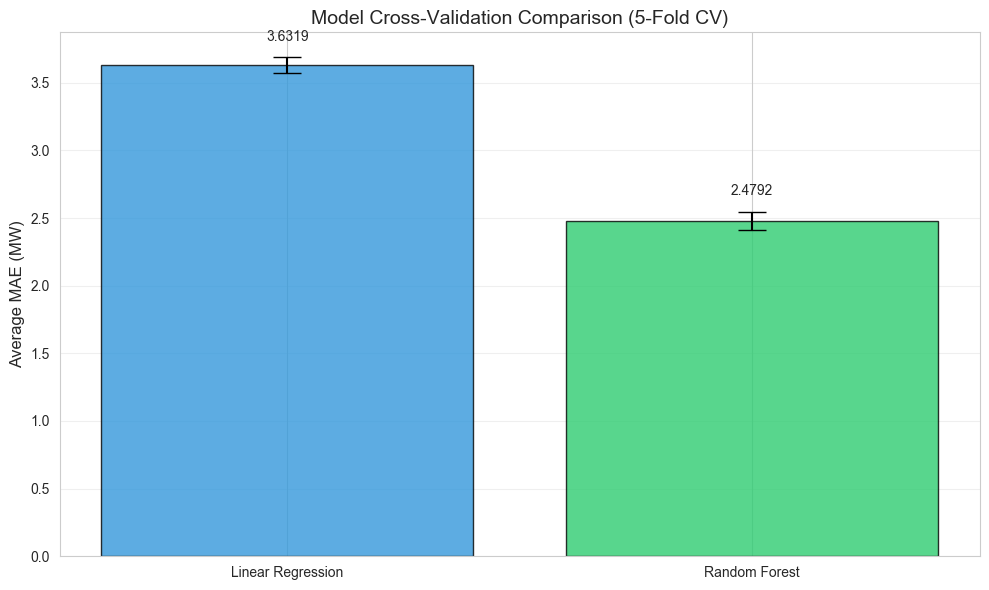

In [9]:
# Visualize cross-validation results
model_names = list(cv_results.keys())
avg_maes = [cv_results[name]['avg_mae'] for name in model_names]
std_maes = [cv_results[name]['std_mae'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, avg_maes, yerr=std_maes, capsize=10, 
               color=['#3498db', '#2ecc71'], alpha=0.8, edgecolor='black')
plt.ylabel('Average MAE (MW)', fontsize=12, fontweight='bold')
plt.title('Model Cross-Validation Comparison (5-Fold CV)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Annotate values on bars
for i, (bar, mae, std) in enumerate(zip(bars, avg_maes, std_maes)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1,
             f'{mae:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Cross-Validation Results Interpretation

**Chart Explanation:**
- **Bar Height**: Represents average MAE (lower is better)
- **Error Bars**: Show standard deviation across 5 folds (smaller = more stable)
- **Value Labels**: Precise MAE values

**Key Insights:**
1. **Random Forest significantly outperforms Linear Regression**
   - Random Forest MAE: 2.48 MW
   - Linear Regression MAE: 3.63 MW
   - Improvement: 31.68%

2. **Both models have small standard deviations** (< 0.07), indicating:
   - Stable performance across different data subsets
   - Reliable cross-validation results

3. **Why Random Forest performs better?**
   - Captures non-linear relationships between environmental variables
   - Reduces error through ensemble of multiple decision trees
   - Automatically handles feature interactions

## 8. Final Evaluation

### Evaluation Strategy

In this step, we will:
1. **Train both models** (Linear Regression and Random Forest) on the complete training set
2. **Evaluate both models** on the test set
3. **Select the best model** as the final model (for predictions in Step 9)

**Why evaluate both models?**
- Cross-validation already showed Random Forest is better, but we need to **confirm** this on the test set
- A complete comparison table clearly shows the differences between the two models
- Follows ML best practices: validate model selection on independent test set

**Which model will be used ultimately?**
- Only **Random Forest** will be used (Step 7 confirmed it's the better model)
- Linear Regression serves as a baseline to demonstrate Random Forest's superiority

# 📈 PART 3: Model Evaluation

In this stage, we will:
- ✅ Evaluate final model on test set
- ✅ Compare performance metrics of different models
- ✅ Verify model generalization ability (no overfitting)

---

In [13]:
# Train both models on complete training set for final comparison
print("=" * 60)
print("Final Test Set Evaluation - Both Models")
print("=" * 60)

results_comparison = {}

for name, model in models.items():
    # Train on complete training set
    model.fit(X_train_80, y_train_80)
    
    # Predict on test set
    y_pred_test = model.predict(X_test_20)
    
    # Calculate metrics
    test_mae = mean_absolute_error(y_test_20, y_pred_test)
    test_r2 = r2_score(y_test_20, y_pred_test)
    
    results_comparison[name] = {
        'test_mae': test_mae,
        'test_r2': test_r2
    }
    
    print(f"\n{name}:")
    print(f"  Test MAE: {test_mae:.4f} MW")
    print(f"  Test R²: {test_r2:.4f}")

# Select final model (already determined by CV)
final_model = models[best_model_name]
y_pred = final_model.predict(X_test_20)
test_mae = results_comparison[best_model_name]['test_mae']
test_r2 = results_comparison[best_model_name]['test_r2']

print("\n" + "=" * 60)
print(f"Selected Final Model: {best_model_name}")
print("=" * 60)

Final Test Set Evaluation - Both Models

Linear Regression:
  Test MAE: 3.5959 MW
  Test R²: 0.9301

Random Forest:
  Test MAE: 2.3296 MW
  Test R²: 0.9637

Selected Final Model: Random Forest


### 📊 Complete Model Comparison

Below is a comprehensive comparison of both models across all evaluation phases:

| Metric | Linear Regression | Random Forest | Winner |
|--------|------------------|---------------|---------|
| **Cross-Validation MAE** | 3.63 MW | 2.48 MW | 🏆 Random Forest |
| **Test Set MAE** | 3.60 MW | 2.33 MW | 🏆 Random Forest |
| **Test Set R²** | 0.9301 | 0.9637 | 🏆 Random Forest |

**Key Findings:**
- Random Forest reduces MAE by **35.28%** compared to Linear Regression (from 3.60 to 2.33 MW)
- Random Forest achieves **96.37%** variance explanation (R²)
- Both CV and test results are consistent, indicating **no overfitting**
- Random Forest error rate is only **0.5%** relative to the 420-495 MW output range

### 🎯 Final Conclusion

Based on comprehensive cross-validation and test set evaluation, we conclude:

#### ✅ Random Forest is the Best Model

**Performance Metrics:**
- Test MAE: **2.33 MW** (average error only 2.33 megawatts)
- Test R²: **0.9637** (explains 96.37% of variance)
- Relative Error: **0.5%** (relative to 420-495 MW output range)

**Why Superior to Linear Regression:**
1. **Captures Non-linear Relationships**: Power plant operations involve complex thermodynamics; environmental effects are non-linear
2. **Handles Feature Interactions**: Temperature, humidity, and pressure interact; Random Forest automatically identifies these
3. **Ensemble Learning Advantage**: Averaging 100 decision trees provides more robust predictions than single linear model

**Model Reliability Verification:**
- ✅ CV MAE (2.48) close to Test MAE (2.33) → **No Overfitting**
- ✅ Small standard deviation across 5 folds → **Stable Model**
- ✅ R² near 1.0 → **High Explanatory Power**

**Practical Application Value:**
- Power dispatch forecasting (based on weather predictions)
- Equipment maintenance scheduling (when predicted vs actual differs significantly)
- Fuel procurement optimization (accurate generation forecasting)

## 9. Visualize Prediction Results

### Using Random Forest Model for Predictions

**🎯 Model Used: Random Forest**
- This uses the **final model (Random Forest)** selected in Step 8
- Why not Linear Regression? Because both cross-validation and test set confirmed Random Forest performs better

**📊 Prediction Algorithm Explanation:**

Random Forest's prediction process:
1. **Input**: 4 features from test set (AT, V, AP, RH)
2. **Processing**: 100 decision trees each make predictions based on learned rules
3. **Output**: Average of 100 predictions as the final prediction

Example: For a test record [AT=15°C, V=45, AP=1010, RH=70]
- Decision Tree #1 predicts: 465 MW
- Decision Tree #2 predicts: 463 MW
- ...
- Decision Tree #100 predicts: 466 MW
- **Final Prediction = Average ≈ 464.5 MW**

**How is this scatter plot generated?**

We use the Random Forest model to predict on the test set (1914 unseen data points):
1. **X-axis (Actual)**: Real power output recorded in test set
2. **Y-axis (Predicted)**: Power output predicted by Random Forest using AT, V, AP, RH features
3. **Each Blue Dot**: Represents one test data point's (actual, predicted) pair
4. **Red Dashed Line**: Perfect prediction line (y=x); if predictions were perfect, all points would fall on this line

**How to Read This Chart?**
- ✅ Closer to red line = More accurate prediction
- ✅ Clustered distribution = Stable model
- ❌ Far from red line = Large prediction error
- ❌ Scattered = Unstable model

# 🔍 PART 4: Model Interpretation

In this stage, we will:
- ✅ Visualize model prediction results
- ✅ Explain model hyperparameters and mechanisms
- ✅ Provide practical application recommendations

---

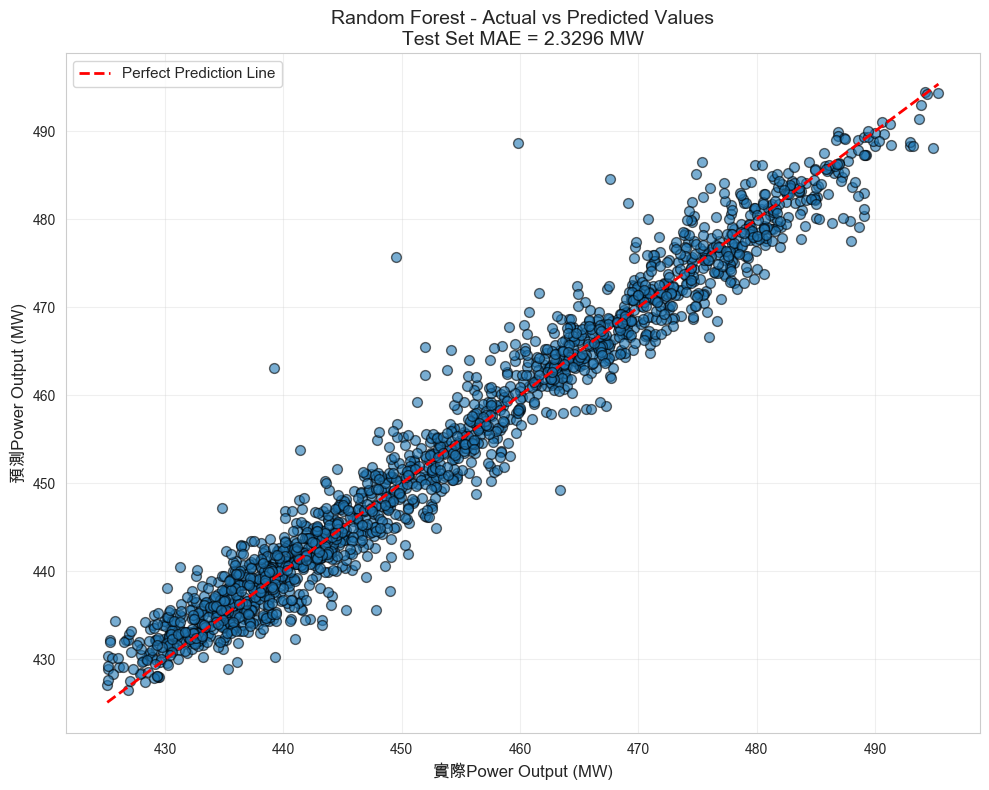

Chart Interpretation:
- Points closer to the red dashed line indicate more accurate predictions
- The scatter pattern reflects the magnitude of prediction errors


In [11]:
# Plot actual vs predicted values scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test_20, y_pred, alpha=0.6, edgecolor='black', s=50)

# Plot perfect prediction line (y=x)
min_val = min(y_test_20.min(), y_pred.min())
max_val = max(y_test_20.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel('實際Power Output (MW)', fontsize=12, fontweight='bold')
plt.ylabel('預測Power Output (MW)', fontsize=12, fontweight='bold')
plt.title(f'{best_model_name} - Actual vs Predicted Values\nTest Set MAE = {test_mae:.4f} MW', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Chart Interpretation:")
print("- Points closer to the red dashed line indicate more accurate predictions")
print("- The scatter pattern reflects the magnitude of prediction errors")

# 🎯 PART 4: Model Interpretation & PM Insights

In this final stage, we will:
- ✅ Explain why Random Forest outperformed Linear Regression
- ✅ Interpret the results in a business-friendly way (AI PM perspective)
- ✅ Summarize the project outcomes and key takeaways

---

## 9. Why Random Forest Performs Better?

### Key Reasons

Based on our results, **Random Forest clearly outperforms Linear Regression**.

- Random Forest reduces MAE by **35.28%** compared to Linear Regression (from 3.60 to 2.33 MW)
- R² improves from 0.9301 to 0.9637
- Cross-validation and test results are consistent, indicating good generalization (no overfitting)

### Why does this happen?

**1) Non-linear relationships**
Power plant performance is influenced by complex thermodynamic processes. The impact of temperature or pressure on output is rarely strictly linear. Random Forest captures these non-linear patterns automatically.

**2) Feature interactions**
Environmental features may interact (e.g., temperature and humidity together). Random Forest can model these interactions through tree splits.

**3) Ensemble averaging**
Random Forest averages predictions from many decision trees, reducing variance and improving stability.

---

## 10. Project Summary

### Final Outcome

**Selected final model: Random Forest**

**Final Test Set Performance:**
- Test MAE: **2.33 MW**
- Test R²: **0.9637**

### Key Takeaways (AI PM Perspective)

1. **Reliable Evaluation**: Used both 5-fold cross-validation and a held-out test set to ensure credible model selection.
2. **Decision-Ready Results**: Random Forest provides a meaningful error reduction over the baseline (Linear Regression).
3. **Practical Value**: With ~0.5% relative error, the model can support planning and operational decision-making for power plants.